In [3]:
import os
import matplotlib.pyplot as plt
from datafilereader import DataFileReader
from datafileviewer_template import DataFileViewer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Coin Classification with Impedance Measurements

This notebook demonstrates how to read impedance data from sensors, extract features, train a machine learning model to classify coins, and make predictions with new data.

## Steps:
1. Reading and Visualizing Data
2. Feature Extraction
3. Data Preprocessing
4. Model Training
5. Model Evaluation
6. Prediction with New Data


## Step 1: Reading and Visualizing Data


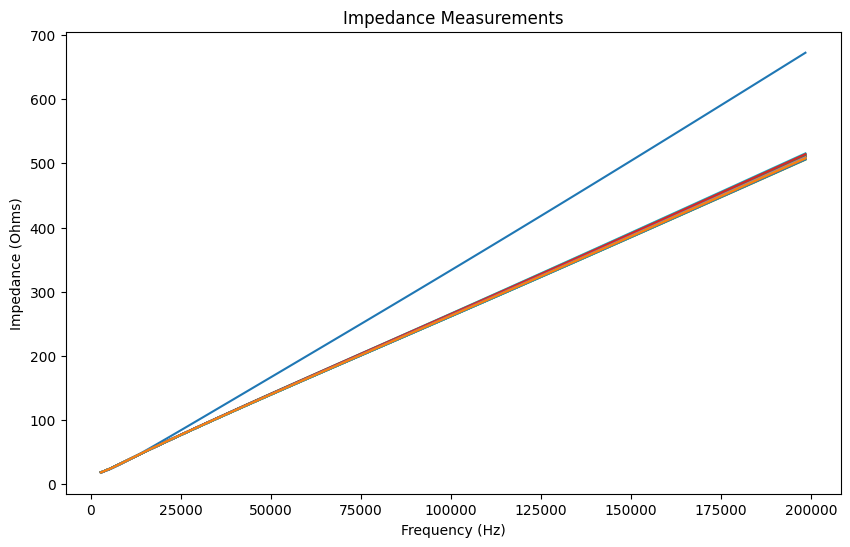

In [5]:
file_path = "./data/EUR_1.h5"  # Example file path
reader = DataFileReader(file_path)
frequency, Z = reader.get_all_mesurements()

plt.figure(figsize=(10, 6))
for z in Z:
    plt.plot(frequency, np.abs(z))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance (Ohms)')
plt.title('Impedance Measurements')
plt.show()


## Step 2: Feature Extraction

We will extract features such as the mean and variance of the real and imaginary parts of the impedance.


In [6]:
def extract_features(frequency, Z):
    features = []
    for z in Z:
        real = np.real(z)
        imag = np.imag(z)
        features.append([
            np.mean(real), np.var(real), np.mean(imag), np.var(imag)
        ])
    return np.array(features)

features = extract_features(frequency, Z)
print("Extracted Features Shape:", features.shape)
print("Sample Features:", features[:5])


Extracted Features Shape: (32, 4)
Sample Features: [[1.21503478e+01 1.09131506e+01 3.37392175e+02 3.75733293e+04]
 [3.55176174e+01 5.40348424e+01 2.62638797e+02 2.08693137e+04]
 [3.56093256e+01 5.45569598e+01 2.62588836e+02 2.08348275e+04]
 [3.54629637e+01 5.44233533e+01 2.63116242e+02 2.09353627e+04]
 [3.57596065e+01 5.65913703e+01 2.62133239e+02 2.07150208e+04]]


## Step 3: Data Preprocessing

Split the data into training and testing sets and standardize the features.


In [7]:
def load_data(file_path):
    reader = DataFileReader(file_path)
    frequency, Z = reader.get_all_mesurements()
    features = extract_features(frequency, Z)
    labels = np.array([0 if reader.get_reference_impedance_index() is not None else 1 for i in range(len(Z))])  # Example label extraction
    return features, labels

features, labels = load_data(file_path)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (22, 4)
Testing Data Shape: (10, 4)


## Step 4: Model Training

Train a RandomForestClassifier on the training data.


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


## Step 5: Model Evaluation

Evaluate the model's performance using classification metrics.


In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[10]]


c:\Users\Zack\miniconda3\envs\ML\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


## Step 6: Prediction with New Data

Use the trained model to make predictions on new impedance data.


In [10]:
def predict_coin(file_path, model, scaler):
    reader = DataFileReader(file_path)
    frequency, Z = reader.get_last_mesurement()
    features = extract_features(frequency, Z)
    features = scaler.transform([features])
    prediction = model.predict(features)
    return prediction

# Save model and scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

new_file_path = "./data/new_data.h5"  # New data file path
prediction = predict_coin(new_file_path, model, scaler)
print(f"Predicted coin type: {prediction}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './data/new_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)